In [375]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from openpyxl import Workbook
import warnings
warnings.filterwarnings("ignore")

In [376]:
ath_df = pd.read_excel('/home/sanjoy/Desktop/DataSet-kaggle/Athletes.xlsx')
coa_df = pd.read_excel('/home/sanjoy/Desktop/DataSet-kaggle/Coaches.xlsx')
entrgender_df = pd.read_excel('/home/sanjoy/Desktop/DataSet-kaggle/EntriesGender.xlsx')
medals_df = pd.read_excel('/home/sanjoy/Desktop/DataSet-kaggle/Medals.xlsx')
teams_df = pd.read_excel('/home/sanjoy/Desktop/DataSet-kaggle/Teams.xlsx')

In [302]:
print("Display All the data's top 5 rows:\n")
ath_df.head()

Display All the data's top 5 rows:



,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


# athletes_data cleaning

Checking duplicates value and null value and fix them

In [303]:
print("The number of rows and columns: "+str(ath_df.shape))

The number of rows and columns: (11085, 3)


In [304]:
duplicates = ath_df[ath_df.duplicated()]
if(duplicates.empty):
    print("No duplicates")
else:
    print("duplicates founds: ")
    print(duplicates)

duplicates founds: 
            Name      NOC Discipline
254  ALI Mohamed  Bahrain   Handball


In [305]:
ath_df[ath_df.Name == "ALI Mohamed"]

,Name,NOC,Discipline
253,ALI Mohamed,Bahrain,Handball
254,ALI Mohamed,Bahrain,Handball


In [306]:
ath_df = ath_df.drop_duplicates()

In [307]:
ath_df.duplicated().sum()

0

In [308]:
ath_df.isna().sum()

Name          0
NOC           0
Discipline    0
dtype: int64

In [309]:
print("the total number of naull values: \n" +str(ath_df.isna().sum()))

the total number of naull values: 
Name          0
NOC           0
Discipline    0
dtype: int64


In [310]:
ath_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11084 entries, 0 to 11084
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        11084 non-null  object
 1   NOC         11084 non-null  object
 2   Discipline  11084 non-null  object
dtypes: object(3)
memory usage: 346.4+ KB


In [311]:
print("Data types of each columns in athletes dataset: \n"+str(ath_df.dtypes))

Data types of each columns in athletes dataset: 
Name          object
NOC           object
Discipline    object
dtype: object


In [312]:
ath_df.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


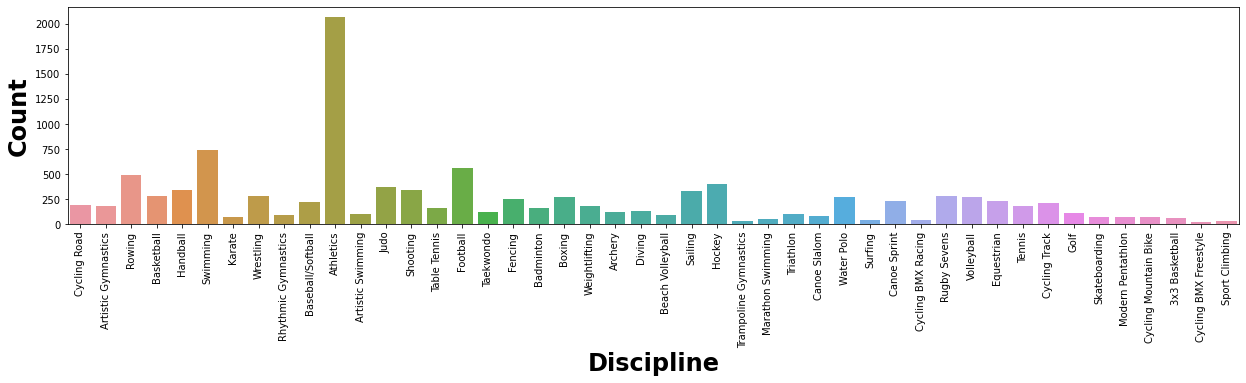

In [313]:
plt.figure(figsize = (21,4))
sns.countplot(x="Discipline",data = ath_df)
plt.xticks(rotation=90)
plt.xlabel("Discipline",fontsize=24,fontweight='bold')
plt.ylabel("Count",fontsize=24,fontweight='bold')
plt.show()

In [ ]:
##Countries with Most number of Participant

In [314]:
top_ten_country = ath_df['NOC'].value_counts()

In [315]:
print("The top 10 countries with most number of participant: \n",(top_ten_country).head(10))

The top 10 countries with most number of participant: 
 United States of America      615
Japan                         586
Australia                     470
People's Republic of China    401
Germany                       400
France                        377
Canada                        368
Great Britain                 366
Italy                         356
Spain                         324
Name: NOC, dtype: int64


# coaches DataSet

In [41]:
coa_df.head()

,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN


In [316]:
print("The number of rows and columns:"+str(coa_df.shape))

dup = coa_df[coa_df.duplicated()]
if (dup.empty):
    print("No duplictates")
else:
    print("There is duplicates:\n")
    print(dup)

The number of rows and columns:(394, 4)
There is duplicates:

                 Name     NOC         Discipline     Event
144  GUERRERO Rolando  Mexico  Baseball/Softball  Softball


In [317]:
coa_df = coa_df.drop_duplicates()

In [318]:
coa_df.duplicated().sum()

0

In [319]:
naValue = coa_df.isna().any(axis=1).sum()
naValue

145

In [320]:
coa_df.isna().sum()

Name            0
NOC             0
Discipline      0
Event         145
dtype: int64

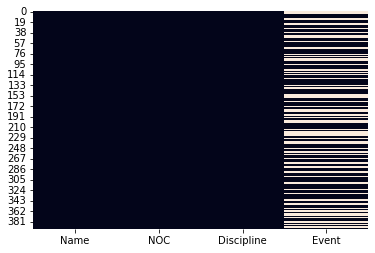

In [321]:
sns.heatmap(coa_df.isna(),cbar=False)
plt.show()

In [322]:
coa_df.dropna(subset=['Event'],how='all',inplace = True)

In [323]:
coa_df.isna().sum()

Name          0
NOC           0
Discipline    0
Event         0
dtype: int64

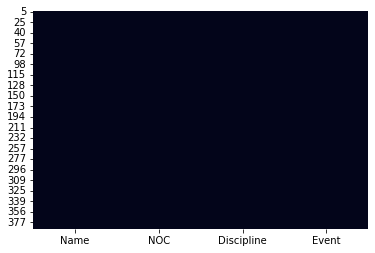

In [324]:
sns.heatmap(coa_df.isna(),cbar=False)
plt.show()

In [325]:
print("Data types of each columns in Coaches dataset: \n"+str(coa_df.dtypes))

Data types of each columns in Coaches dataset: 
Name          object
NOC           object
Discipline    object
Event         object
dtype: object


In [326]:
coa_df.head()

,Name,NOC,Discipline,Event
5,AIKMAN Siegfried Gottlieb,Japan,Hockey,Men
6,AL SAADI Kais,Germany,Hockey,Men
7,ALAMEDA Lonni,Canada,Baseball/Softball,Softball
8,ALEKNO Vladimir,Islamic Republic of Iran,Volleyball,Men
9,ALEKSEEV Alexey,ROC,Handball,Women


In [327]:
coa_df['Event'].value_counts()

Men         94
Women       88
Duet        27
Softball    19
Team        14
Baseball     6
Name: Event, dtype: int64

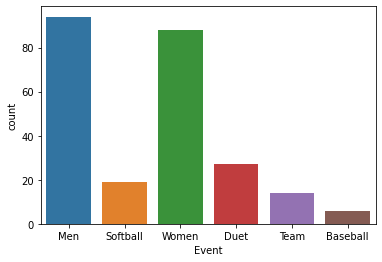

In [328]:
sns.countplot(x='Event',data=coa_df)
plt.show()

In [329]:
dup_entrG = entrgender_df[entrgender_df.duplicated()]
if(dup_entrG.empty):
    print("No duplicates")
else:
    print("There is duplicates")
    print(dup_entrG)

No duplicates


In [331]:
print("Null value:"+str(entrgender_df.isna().any(axis=1).sum()))

Null value:0


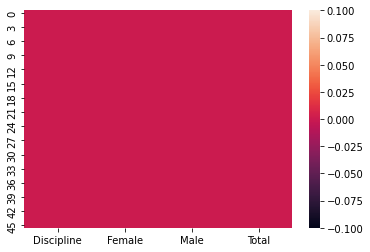

In [332]:
sns.heatmap(entrgender_df.isna())
plt.show()

In [333]:
entrgender_df.head()

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


In [ ]:
#total count of female and male

In [334]:
x = entrgender_df['Female'].sum()

In [335]:
y = entrgender_df['Male'].sum()

In [336]:
gender_des = entrgender_df.sort_values(by='Total', ascending= False).reset_index(drop=True).head(10)

gender_des

,Discipline,Female,Male,Total
0,Athletics,969,1072,2041
1,Swimming,361,418,779
2,Football,264,344,608
3,Rowing,257,265,522
4,Judo,192,201,393
5,Hockey,192,192,384
6,Shooting,178,178,356
7,Sailing,175,175,350
8,Handball,168,168,336
9,Rugby Sevens,146,151,297


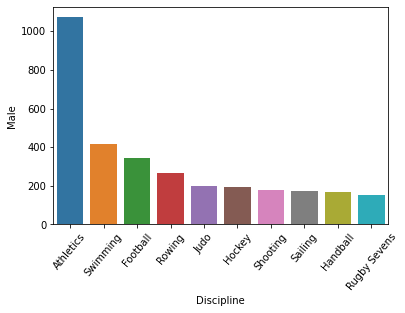

In [337]:
sns.barplot(x=gender_des['Discipline'],y=gender_des['Male'])
plt.xticks(rotation=50)

plt.show()

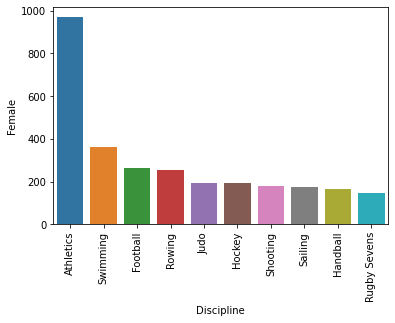

In [338]:
sns.barplot(x=gender_des['Discipline'],y=gender_des['Female'])
plt.xticks(rotation=90)
plt.show()

In [339]:
import plotly.express as px

In [340]:
px.bar(gender_des, x ='Discipline',
        y=['Female','Male'],
        color_discrete_sequence =['#9852F9','#40BFC1'],
        title = "Distribution of genders across Discipline")

In [341]:
gender = [entrgender_df['Male'].sum(),entrgender_df['Female'].sum()]
print("Total male and female is :" ,gender)

Total male and female is : [5884, 5432]


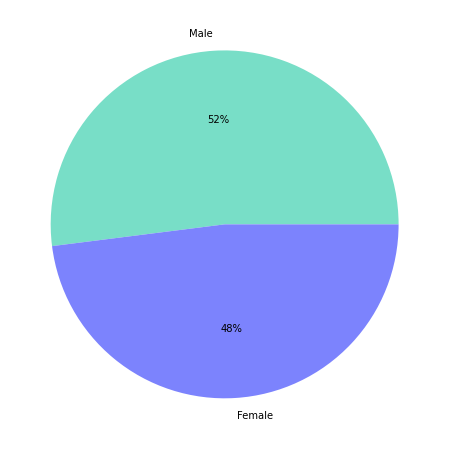

In [342]:
plt.figure(figsize=(10,8))
plt.pie(gender,labels = ["Male","Female"],autopct ="%.f%%",colors = ["#78DEC7","#7C83FD"] )
plt.show()

# Medals DataSet

In [343]:
medals_df.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [344]:
print("The number of rows and columns: "+str(medals_df.shape))

The number of rows and columns: (93, 7)


In [345]:
dup_med = medals_df[medals_df.duplicated()]
if(dup_med.empty):
    print("No duplicates")
else:
    print("There is duplicates: \n ")
    print(dup_med)

No duplicates


In [346]:
print("Null value: "+str(medals_df.isna().any(axis=1).sum()))

Null value: 0


In [347]:
medals_des = medals_df.sort_values(by='Total', ascending= False).reset_index(drop=True).head(10)

In [348]:
medals_des

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,5,ROC,20,28,23,71,3
3,4,Great Britain,22,21,22,65,4
4,3,Japan,27,14,17,58,5
5,6,Australia,17,7,22,46,6
6,10,Italy,10,10,20,40,7
7,9,Germany,10,11,16,37,8
8,7,Netherlands,10,12,14,36,9
9,8,France,10,12,11,33,10


In [349]:
fig = px.bar(medals_des, x="Team/NOC", y=["Gold","Silver","Bronze"], title="Long-Form Input")
fig.show()

In [350]:

x_gold = medals_df.sort_values(['Gold'],ascending = False)

In [351]:
 x_gold = x_gold['Gold'].head(10)

In [352]:
y_labels = medals_df['Team/NOC'].head(10)

In [353]:
y_labels

0      United States of America
1    People's Republic of China
2                         Japan
3                 Great Britain
4                           ROC
5                     Australia
6                   Netherlands
7                        France
8                       Germany
9                         Italy
Name: Team/NOC, dtype: object

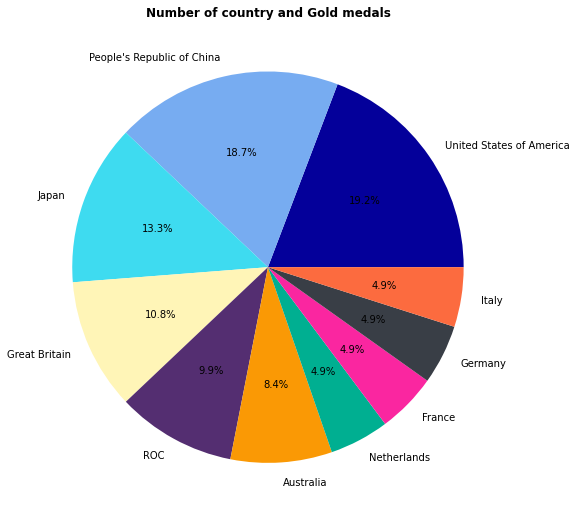

In [354]:
plt.figure(figsize=(10,9))
mycolor=["#04009A","#77ACF1","#3EDBF0","#FFF5B7","#542E71","#FA9905","#00AF91","#FA26A0","#393E46","#FC6B3F"]
plt.title("Number of country and Gold medals",fontweight = 'bold')
plt.pie(x_gold,labels=y_labels,colors = mycolor,autopct="%1.1f%%")
plt.show()

In [355]:
x_silver = medals_df.sort_values(['Silver'],ascending = False)

In [356]:
x_silver = x_silver['Silver'].head(10)

In [357]:
y_silver_labels = medals_df['Team/NOC'].head(10)

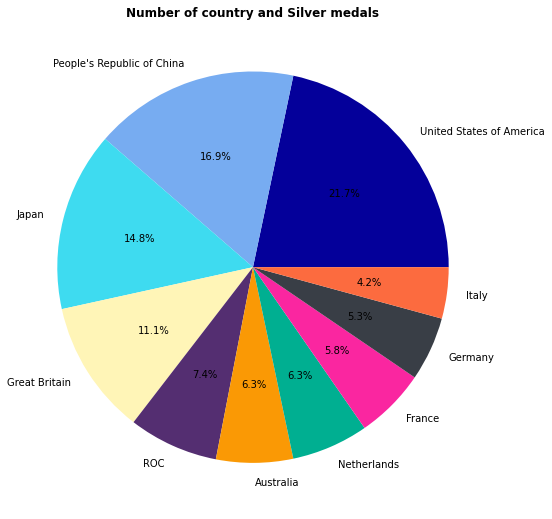

In [358]:
plt.figure(figsize=(10,9))
mycolor=["#04009A","#77ACF1","#3EDBF0","#FFF5B7","#542E71","#FA9905","#00AF91","#FA26A0","#393E46","#FC6B3F"]
plt.pie(x_silver,labels=y_silver_labels,colors = mycolor,autopct="%1.1f%%")
plt.title("Number of country and Silver medals",fontweight = 'bold')
plt.show()

In [359]:
x_bronze = medals_df.sort_values(['Bronze'],ascending = False)
x_bronze = x_bronze['Bronze'].head(10)
y_labels_bronze = medals_df['Team/NOC'].head(10)

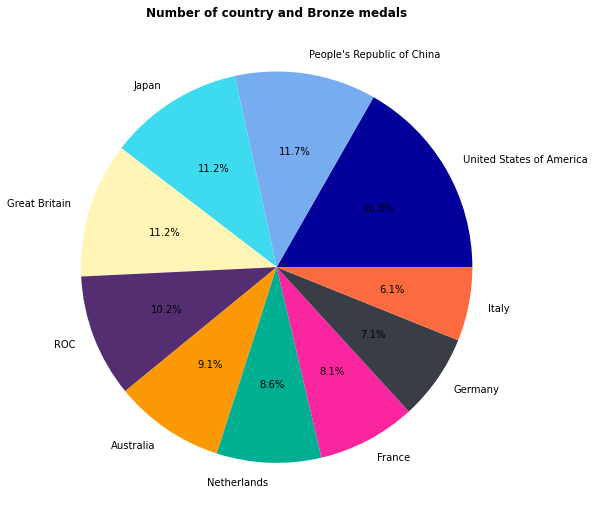

In [360]:
plt.figure(figsize=(10,9))

mycolor=["#04009A","#77ACF1","#3EDBF0","#FFF5B7","#542E71","#FA9905","#00AF91","#FA26A0","#393E46","#FC6B3F"]
plt.pie(x_bronze,labels=y_labels_bronze,autopct="%1.1f%%",colors = mycolor)

plt.title("Number of country and Bronze medals",fontweight = 'bold')
plt.show()

# Teamp DataSet

In [361]:
teams_df.head()

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


In [362]:
print("The number of rows and columns: "+str(teams_df.shape))

The number of rows and columns: (743, 4)


In [363]:
dup_tem = teams_df[teams_df.duplicated()]
if(dup_tem.empty):
    print("No duplicates")
else:
    print("There is duplicates: \n ")
    print(dup_med)

No duplicates


In [364]:
print("Null value: "+str(teams_df.isna().any(axis=1).sum()))

Null value: 0


In [271]:
teams_df['Discipline'].value_counts()

Swimming               113
Athletics               79
Cycling Track           64
Archery                 53
Fencing                 52
Beach Volleyball        48
Table Tennis            48
Artistic Swimming       32
Football                28
Artistic Gymnastics     24
Volleyball              24
Basketball              24
Handball                24
Hockey                  24
Rugby Sevens            24
Water Polo              22
Triathlon               18
3x3 Basketball          16
Rhythmic Gymnastics     14
Baseball/Softball       12
Name: Discipline, dtype: int64

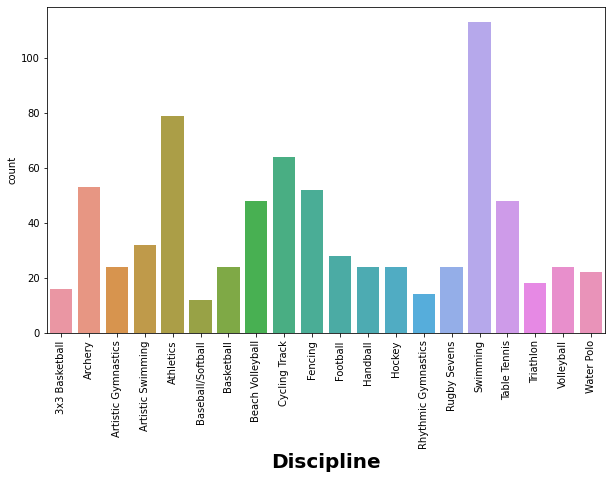

In [374]:
plt.figure(figsize=(10,6))
sns.countplot(x='Discipline',data=teams_df)

plt.xticks(rotation=90)
plt.xlabel("Discipline",fontsize=20,fontweight='bold')
plt.show()